In [ ]:
## website we're using - https://www.imdb.com/search/title/?groups=top_1000&view=simple&sort=user_rating,desc

In [5]:
import os
import time
import random
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [2]:
def download_html(url):
    try:
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(req).read()
        return html
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [3]:
# Function to scrape movie data
def scrape_movies(html_content, ratings, votes, grosses):
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract movie data
    movie_containers = soup.find_all('div', class_='lister-item mode-advanced')
    for container in movie_containers:
        if container.find('div', class_='ratings-bar'):
            # Extract ratings
            rating = float(container.strong.text)
            ratings.append(rating)

            # Extract number of votes
            vote = container.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

            # Extract gross earnings if available
            gross_span = container.find_all('span', attrs={'name':'nv'})
            if len(gross_span) > 1 and 'data-value' in gross_span[1].attrs:
                grosses.append(int(gross_span[1]['data-value'].replace(',', '')))
            else:
                grosses.append(None)  # Append None if gross is not available

Sleep for 2.2216825197244265 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=1&count=100
Sleep for 1.6528517407904086 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=101&count=100
Sleep for 1.4856153145507918 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=201&count=100
Sleep for 2.269629732726175 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=301&count=100
Sleep for 4.849124613755156 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=401&count=100
Sleep for 4.032625238983257 seconds
Download from: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start=501&count=100
Sleep for 0.9250729243849443 seconds
Download from: https://www.imdb.com/search/t

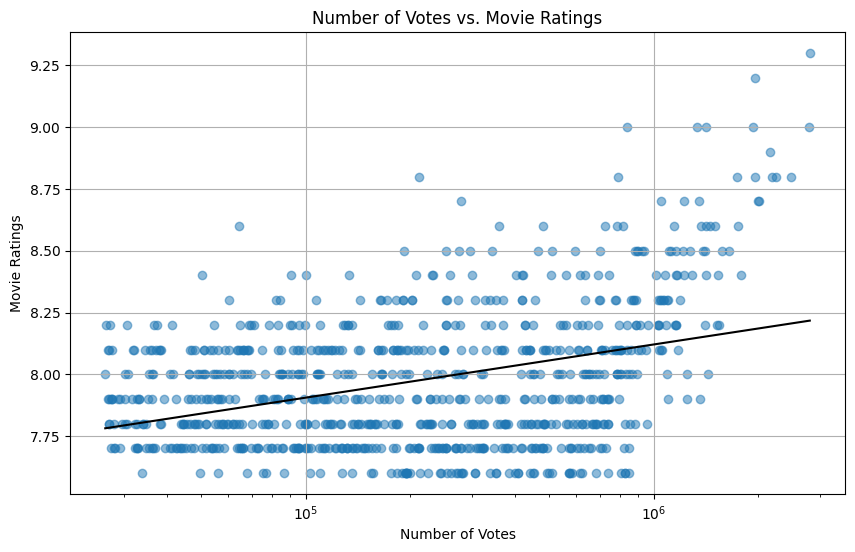

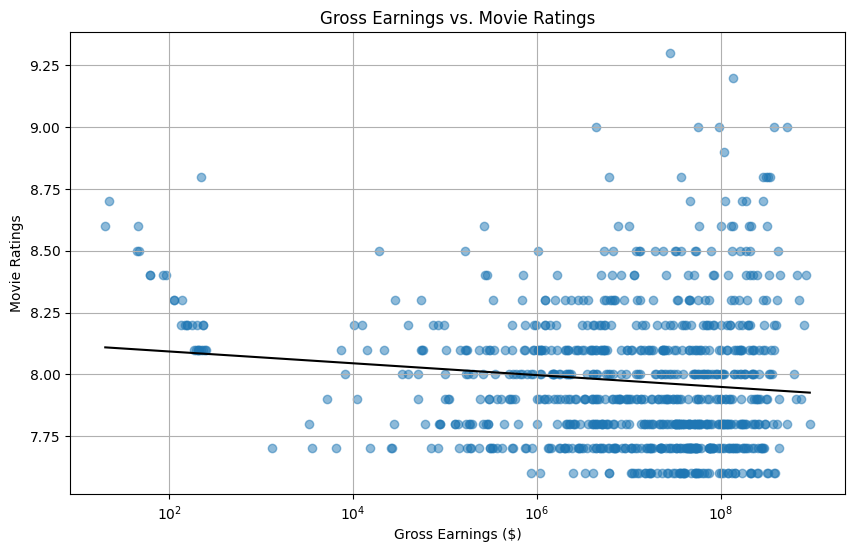

In [10]:
def create_scatter_plot(x, y, title, x_label, y_label, filename):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)

    log_x = np.log(x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

    best_fit_x = np.linspace(min(x), max(x), 1000)
    best_fit_y = slope * np.log(best_fit_x) + intercept

    plt.plot(best_fit_x, best_fit_y, color='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yscale('linear')
    plt.xscale('log')
    plt.grid(True)
    plt.savefig(filename)
    plt.show()


# Lists to store scraped data
ratings = []
votes = []
grosses = []

# Loop through pages to download IMDb's top 1000 movies
start = 1
for y in range(1, 11):
    tmp = random.random() * 5.0
    print('Sleep for', tmp, 'seconds')
    time.sleep(tmp)

    url = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&view=advanced&start={start}&count=100"
    print('Download from:', url)

    # Download and scrape the HTML page
    html = download_html(url)
    if html:
        scrape_movies(html, ratings, votes, grosses)
    else:
        print(f"Failed to retrieve data from {url}")

    start += 100

clean_votes = [vote for vote, gross in zip(votes, grosses) if gross is not None]
clean_ratings = [rating for rating, gross in zip(ratings, grosses) if gross is not None]
clean_grosses = [gross for gross in grosses if gross is not None]

# Create scatter plots
create_scatter_plot(clean_votes, clean_ratings, 'Number of Votes vs. Movie Ratings', 'Number of Votes', 'Movie Ratings', 'votes_vs_ratings.png')
create_scatter_plot(clean_grosses, clean_ratings, 'Gross Earnings vs. Movie Ratings', 'Gross Earnings ($)', 'Movie Ratings', 'gross_vs_ratings.png')

**Movie Ratings vs Number of votes**

There is a positive relationship between movie ratings and the number of votes they receive. This trend can be partly explained by the behavior of viewers: those who truly enjoy a movie often take the extra effort to leave a high rating. Conversely, viewers who dislike a movie are also motivated to rate it, typically giving it a low score. However, these are the top 1000 rated movies, so the movies on the lower end of the data are neutral and movies that have a neutral response tend not to compel viewers to vote at all.


**Movie Ratings vs Gross Earnings**

There's a trend showing that as movie earnings increase, ratings tend to decrease. This might be due to differences in movie genres. For instance, sci-fi movies are expensive to produce but may not always get high ratings, whereas dramas, which are cheaper to make, often receive better reviews.